# PROYECTO DE REGRESION LINEAL

IMPORTS


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from pickle import dump, load
from sklearn.feature_selection import chi2 , SelectKBest, mutual_info_regression
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, r2_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics

In [2]:
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep = ",")

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", sep = ",")
total_data = pd.concat([train_data,test_data]).reset_index(inplace=False, drop = True)
total_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
2671,50,male,30.970,3,no,northwest,10600.54830
2672,18,female,31.920,0,no,northeast,2205.98080
2673,18,female,36.850,0,no,southeast,1629.83350
2674,21,female,25.800,0,no,southwest,2007.94500


In [3]:
total_data.shape


(2676, 7)

In [4]:
total_data = total_data.drop_duplicates().reset_index(drop = True)
total_data


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


In [5]:
total_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


ANALISIS DATOS NUMERICOS

In [7]:
num=["age","children","charges","bmi"]#estos son todos los valores numericos
total_data[num].describe().T

,count,mean,std,min,25%,50%,75%,max
age,1337.0,39.222139,14.044333,18.0000,27.000,39.0000,51.00000,64.00000
children,1337.0,1.095737,1.205571,0.0000,0.000,1.0000,2.00000,5.00000
charges,1337.0,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801
bmi,1337.0,30.663452,6.100468,15.9600,26.290,30.4000,34.70000,53.13000


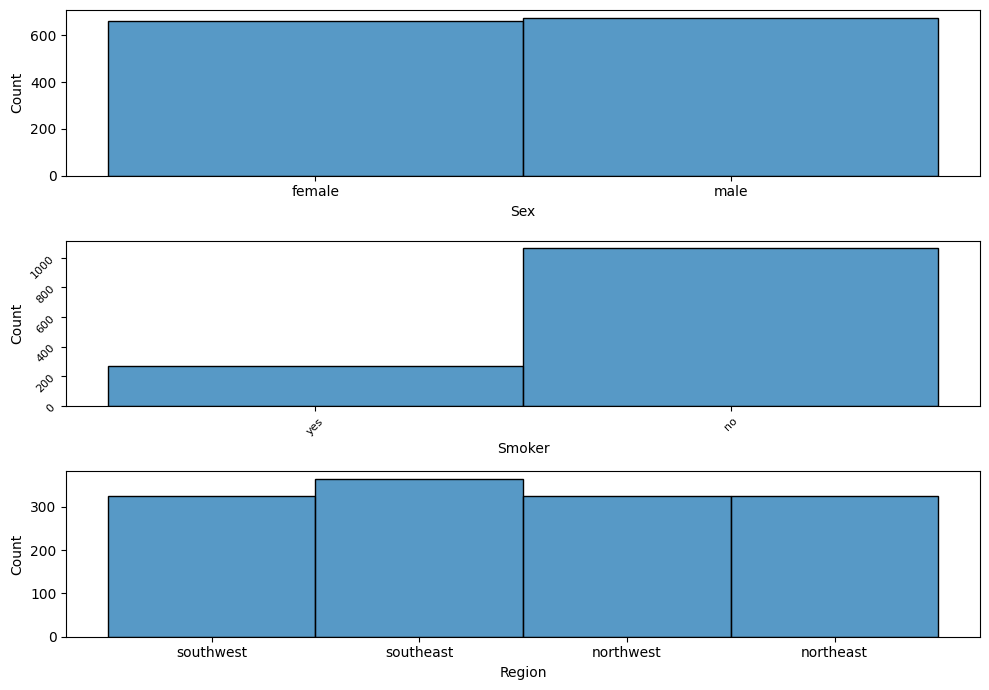

In [8]:
fig, axs = plt.subplots(3, figsize = (10, 7))


sns.histplot(ax = axs[0], data = total_data, x = "sex").set(xlabel = 'Sex')
sns.histplot(ax = axs[1], data = total_data, x = "smoker").set(xlabel = 'Smoker')
sns.histplot(ax = axs[2], data = total_data, x = "region").set(xlabel = 'Region')
axs[1].tick_params(labelrotation=45, labelsize=8)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

En estos histogramas comprobamos que el primero y el ultimo, tanto sexo como region estan muy parejos, y comprobamos una desigualdad mayoritaria en no fumadores con respecto a fumadores

VALORES NUMERICOS

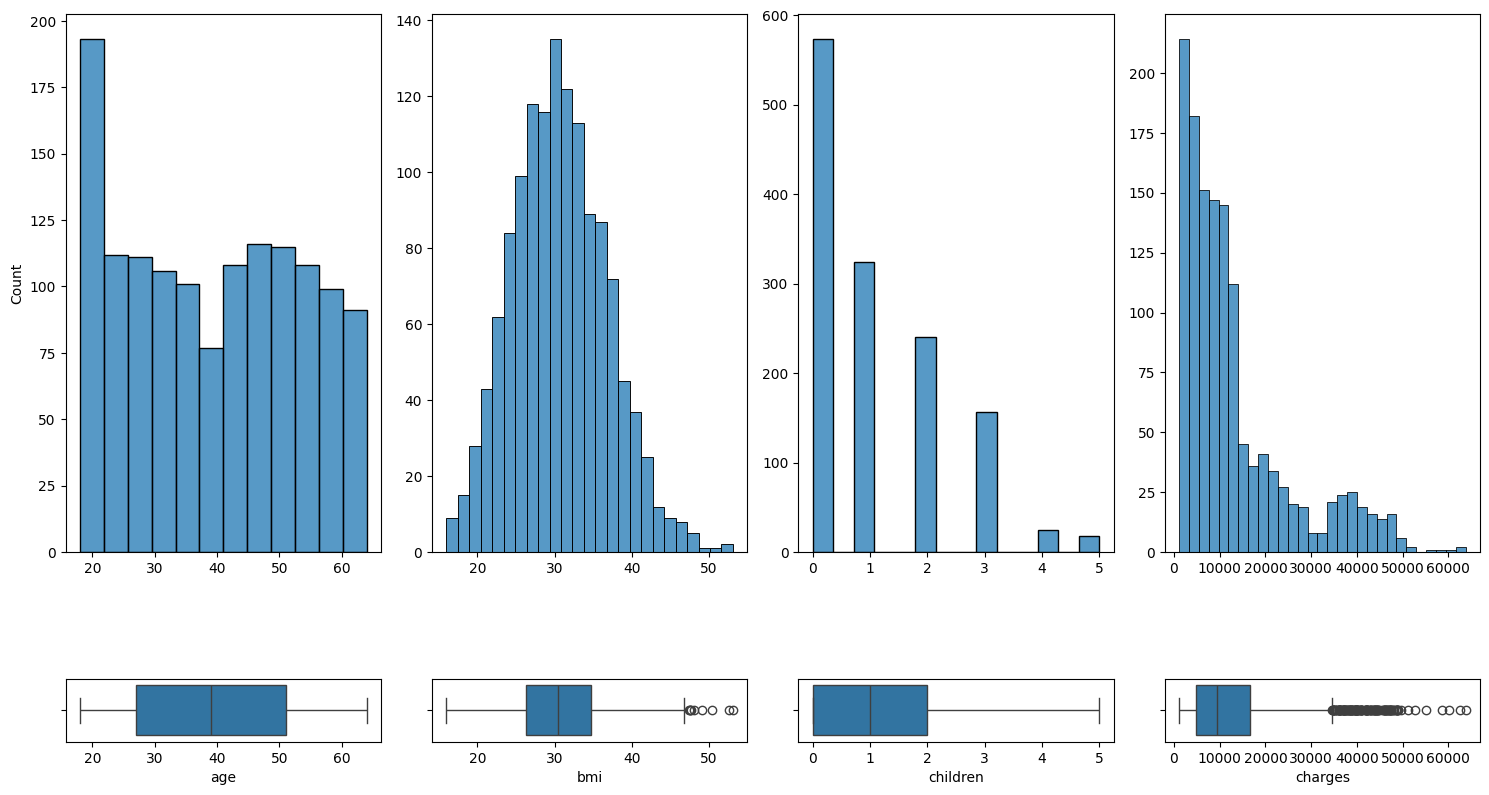

In [9]:
#Creamos resto de histogramas y boxplots
fig, axs = plt.subplots(2, 4, figsize = (15, 10))

sns.histplot(ax = axs[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = total_data, x = "age").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = total_data, x = "bmi").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = total_data, x = "bmi").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = total_data, x = "children").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = total_data, x = "children").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 3], data = total_data, x = "charges").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 3], data = total_data, x = "charges").set_box_aspect(0.2)

plt.tight_layout()

plt.show()

la información sobre el índice de masa corporal (IMC) sigue una distribución normal. En caso de que tenga una correlación alta con la variable objetivo, sería un predictor muy sólido.

En cuanto al resto de las variables, parece que no hay características notables, excepto algunos valores atípicos en los cargos médicos.

Análisis de variables multivariadas

Numéricas

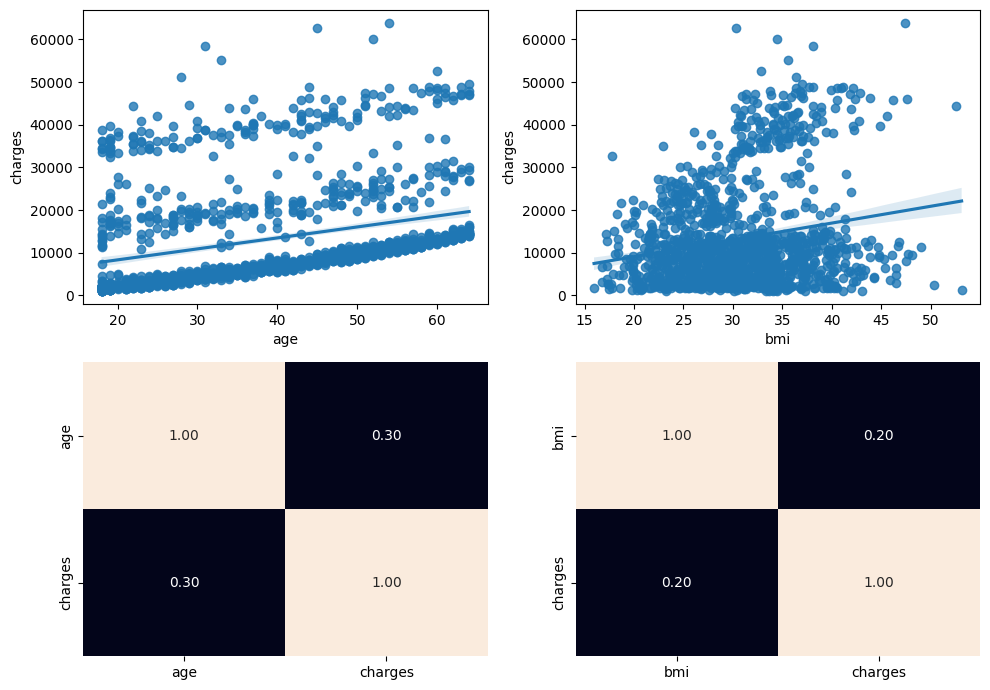

In [10]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))


sns.regplot(ax = axis[0, 0], data = total_data, x = "age", y = "charges")
sns.heatmap(total_data[["age", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "bmi", y = "charges")
sns.heatmap(total_data[["bmi", "charges"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


plt.tight_layout()
plt.show()

En relación a la edad, se observan tres grupos distintos que parecen seguir patrones lineales. Esto sugiere que esta variable, posiblemente combinada con otra (probablemente categórica), podría ser un predictor muy efectivo.

En cuanto al índice de masa corporal (IMC), también muestra una tendencia hacia el extremo inferior de la variable de cargos, aunque aún exhibe una considerable dispersión.

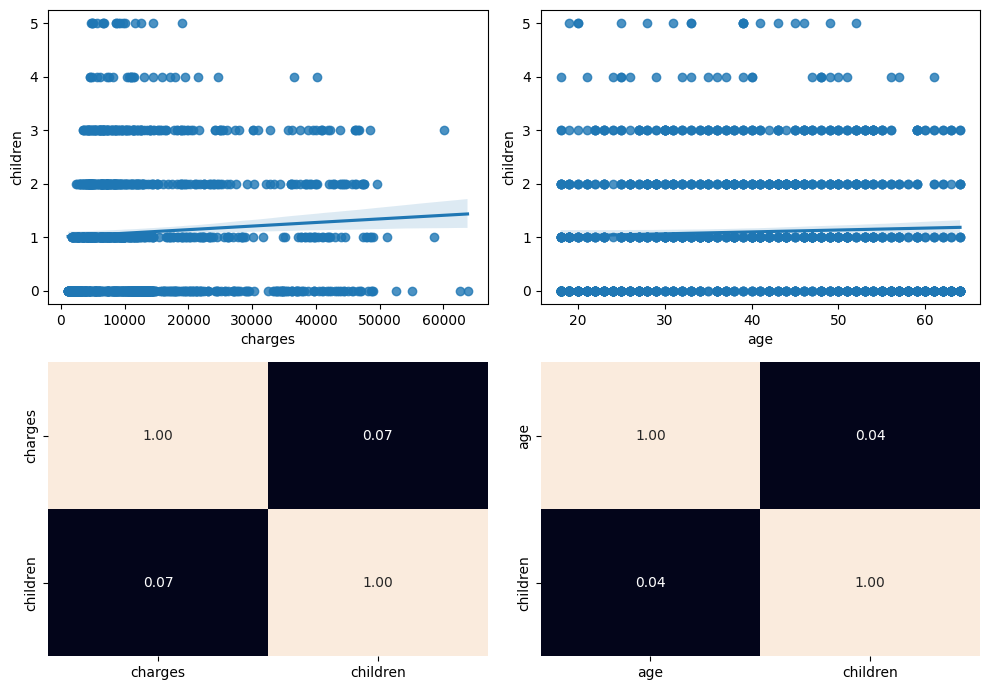

In [11]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))


sns.regplot(ax = axis[0, 0], data = total_data, x = "charges", y = "children")
sns.heatmap(total_data[["charges", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "age", y = "children")
sns.heatmap(total_data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


plt.tight_layout()
plt.show()

CATEGORICAS - CATEGORICAS

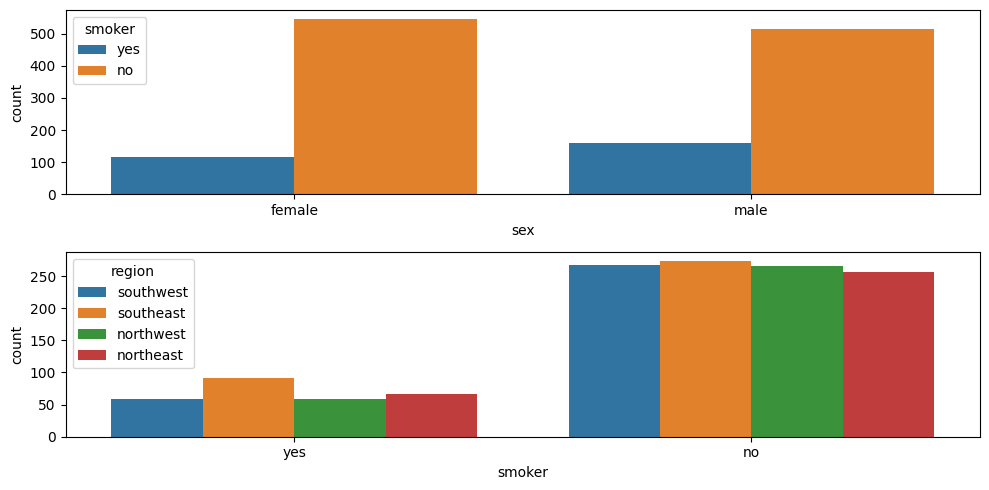

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5))
sns.countplot(data=total_data, x="sex", hue="smoker", ax=axs[0])
sns.countplot(data=total_data, x="smoker", hue="region", ax=axs[1])

plt.tight_layout()
plt.show()

Existen mas fumadores hombres y ligermante mas fumadores en la region de sureste.

CATEGORICAS CONTRA NUMERICAS

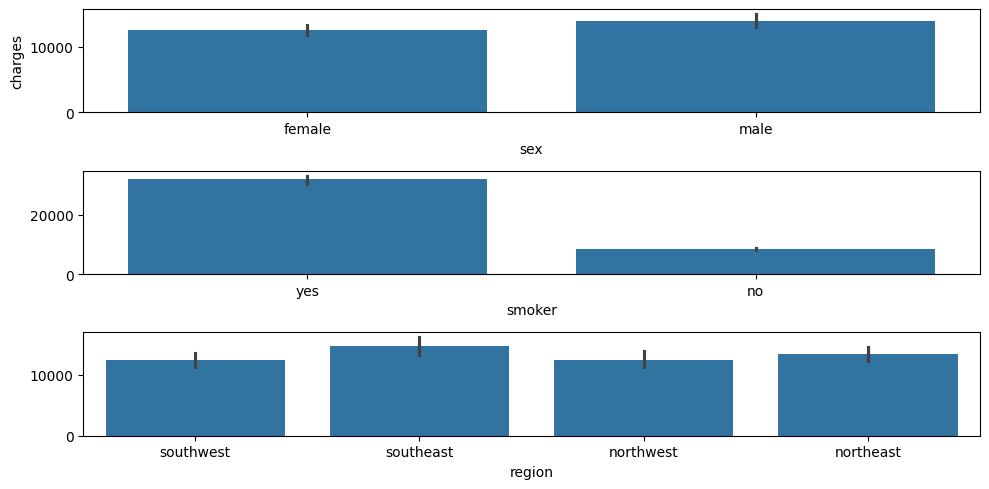

In [13]:
fig, axis = plt.subplots(3, figsize = (10, 5))

sns.barplot(ax = axis[0], data = total_data, x = "sex", y = total_data["charges"])
sns.barplot(ax = axis[1], data = total_data, x = "smoker", y = total_data["charges"]).set(ylabel = None)
sns.barplot(ax = axis[2], data = total_data, x = "region", y = total_data["charges"]).set(ylabel = None)

plt.tight_layout()

plt.show()

Como se puede observar a los hombres se les cobra de media un poco mas, a los fumadores se les cobra más, y la region del sureste (posiblemente al existir mas fumadores) se les cobra tambien más.

ANALISIS DE CORRELACION.


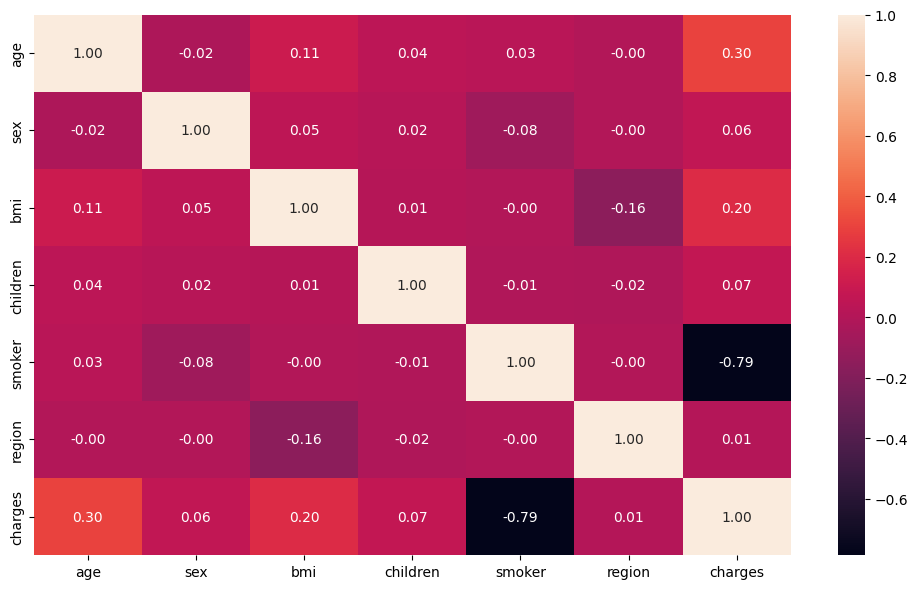

In [14]:
total_data_factorised = total_data
total_data_factorised["sex"] = pd.factorize(total_data["sex"])[0]
total_data_factorised["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data_factorised["region"] = pd.factorize(total_data["region"])[0]
total_data_factorised.to_csv("../data/interim/factorised_eda_results.csv", index=False)

fig, axis = plt.subplots(figsize = (10, 6))

sns.heatmap(total_data_factorised.corr(), annot = True, fmt = ".2f")

plt.tight_layout()
plt.show()

La mayor correlacion que observamos es negativa entre ser fumador y el precio , y positiva aunque un 0.2 entre el bmi y el precio.

FEATURE ENGINEERING

Análisis de  los valores faltantes

In [15]:
total_data = pd.read_csv("../data/interim/factorised_eda_results.csv")
total_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


OUTLIER

In [16]:
total_data[['age', 'bmi', 'children', 'charges']].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


ESCALADO

In [17]:
from sklearn.preprocessing import MinMaxScaler

num_variables = list(total_data.columns)
num_variables.remove('charges')

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(total_data[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data.index, columns = num_variables)
total_data_norm["charges"] = total_data["charges"]
total_data_norm.head()
total_data.to_csv("../data/processed/scaled_data.csv")

MODEL TRAINING

In [18]:
total_data_norm = pd.read_csv("../data/interim/factorised_eda_results.csv")

X = total_data_norm.drop(["charges"], axis = 1)
y = total_data_norm["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7997307254764465

In [19]:
print(f"Intercepción (a): {model.intercept_}")
print(f"Coeficientes (b1, b2): {model.coef_}")

Intercepción (a): 10843.446681776453
Coeficientes (b1, b2): [   254.47074066     41.75497984    323.71982273    541.58750046
 -23336.37729961    300.31155813]


In [20]:
y_pred = model.predict(X_test)

print(f"Error Cuadrático medio de raiz : {np.sqrt(mean_squared_error(y_test, y_pred))}")
print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error Cuadrático medio de raiz : 5968.643255465005
Coeficiente de determinación: 0.7997307254764465


In [30]:
with open("../models/linear_regression_model.pkl", "wb") as f:
    pickle.dump(model, f)